## Métodos de Otimização: Métodos Heuristicos

### Evolução Diferenciada

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random
import time
name = 'Evolução Diferenciada' 
Start = time.time()

In [2]:
def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

In [3]:
nFunc = 5
Qvar = 2
Qtind = 20
F = 0.8 #[0,2]
niter_max=150
countFunc = 0

pop =np.zeros((Qtind,Qvar) , dtype = 'float')
pop_new =np.zeros((Qtind,Qvar) , dtype = 'float')
fpop =np.zeros(Qtind , dtype = 'float')
pbest =np.zeros(Qvar , dtype = 'float')
xmin =np.zeros(Qvar , dtype = 'float')
xmax =np.zeros(Qvar , dtype = 'float')
delta =np.zeros(2 , dtype = 'float')
r =np.zeros(Qvar , dtype = 'float')
fHist = []

xmin[0] = -5; xmin[1] = 0
xmax[0] = 10; xmax[1] = 15
CR = 0.5

In [4]:
#criando a populacao inicial e suas funcoes objetivo
for i in range(0, Qtind):
    for j in range(0, Qvar):
        r[j] = random.random()
        pop[i,j] = xmin[j]+(1.-r[j])*(xmax[j]-xmin[j])
    fpop[i],countFunc = f(pop[i,:],nFunc,Qvar,countFunc)

minlocobj=np.argmin(fpop)
pbest[:]=pop[minlocobj,:]
fbest=fpop[minlocobj]
fHist.append(fbest)

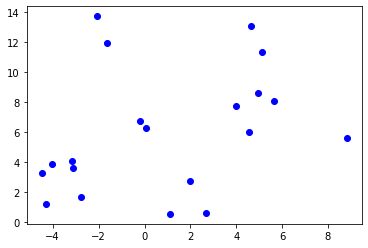

In [5]:
plt.plot(pop[:,0], pop[:,1], 'bo')
plt.show()

In [6]:
pop_new=pop.copy()
layout = "{0:.5f}"
niter=0
while niter<niter_max:
    for i in range(0,Qtind):
        alpha = random.randrange(Qtind)
        while (alpha==i) : alpha = random.randrange(Qtind)
        beta = random.randrange(Qtind)
        while (beta==i and beta==alpha): beta = random.randrange(Qtind)
        gamma = random.randrange(Qtind)
        while (gamma==i and gamma==alpha and gamma==beta): gamma = random.randrange(Qtind)
        r = random.random()
        if r<CR:
            delta[0] = 0; delta[1] = 1
        else:
            delta[0] = 1; delta[1] = 0

        for j in range(0, Qvar):
            pop_new[i,j] = delta[0]*pop[i,j]+delta[1]*(pop[alpha,j]+F*(pop[beta,j]-pop[gamma,j]))
            pop_new[i,j] = max(min(pop_new[i,j],xmax[j]),xmin[j])

        fsol,countFunc = f(pop_new[i,:],nFunc,Qvar,countFunc)
        
        if fsol < fpop[i] :
            fpop[i]=fsol
            pop[i,:]=pop_new[i,:]
                
    minlocobj=np.argmin(fpop)
    pbest[:]=pop[minlocobj,:]
    fbest=fpop[minlocobj]
    print(layout.format(pbest[0])+" "+layout.format(pbest[1])+" "+layout.format(fbest))
    fHist.append(fbest)
    niter += 1


10.00000 3.93946 2.82018
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
-3.38490 13.46928 1.04299
3.38235 2.39013 0.76210
9.55313 2.44070 0.49781
9.55313 2.44070 0.49781
9.31941 2.46695 0.45744
9.31941 2.46695 0.45744
9.31941 2.46695 0.45744
9.31941 2.46695 0.45744
9.31941 2.46695 0.45744
9.31941 2.46695 0.45744
9.31941 2.46695 0.45744
9.44276 2.33967 0.42211
3.14850 2.31054 0.39979
3.14850 2.31054 0.39979
3.14850 2.31054 0.39979
3.14850 2.31054 0.39979
3.14850 2.31054 0.39979
3.14850 2.31054 0.39979
3.14850 2.31054 0.39979
3.14850 2.31054 0.39979
3.14850 2.31054 0.39979
3.14850 2.31054 0.39979
3.13437 2.29761 0.39843
3.13437 2.29761 0.39843
3.13437

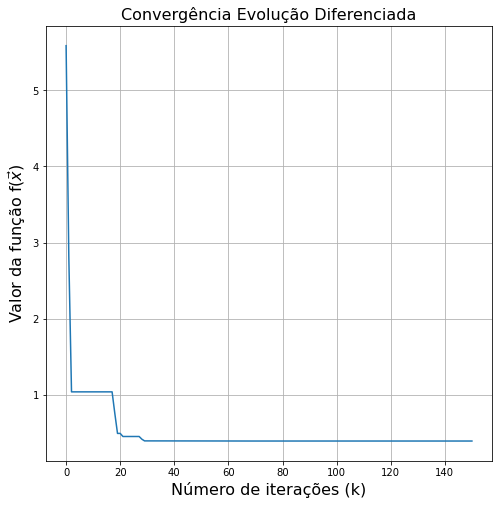

In [7]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,niter_max+1),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [8]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  3020
Tempo de Execução = 56.786041498184204 s
